# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the file
df = pd.read_csv('smartphones data.csv')

In [2]:
# Checking the shape of dataframe
df.shape

(1020, 11)

In [3]:
# Reading first 4 rows of the dataframe
df.head(4)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [4]:
# Let's check data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [5]:
# Let's check any duplicated values
df.duplicated().sum()

0

In [6]:
# Let's check percentage of missing vaulues
df.isnull().mean()*100

model         0.000000
price         0.000000
rating       13.823529
sim           0.000000
processor     0.000000
ram           0.000000
battery       0.000000
display       0.000000
camera        0.098039
card          0.686275
os            1.666667
dtype: float64

# Data cleaning and processing

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' symbol and has comma between numbers and phone Namotel at index 608 has a price of 99 `Done`
4. **ratings** - missing values `completeness`
5. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
6. There is ipod on row 756 `validity`
7. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
8. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
9. **display** - sometimes frequency is not available `completeness`
10. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
11. certain phones are foldable and the info is scattered `validity`
12. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
13. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
14. **card** - sometimes contains info about os and camera `validity`
15. **os** - sometimes contains info about bluetooth and fm radio `validity`
16. **os** - issue with rows (324,378) `validity`
17. **os** - sometimes contains os version name like lollipop `consistency`
18. missing values in camera, card and os `completeness`
19. datatype  of price and rating is incorrect `validity`

In [7]:
# let's remove the Rupee symbol and commas in price feature
def treat_price(value):
    rs = value[1:]
    rs = int(rs.replace(",",""))
    return rs

# Applying the function on price feature 
df['price'] = df['price'].apply(treat_price)

# Removing the row with price = 99, because it is not possible
df.drop(index = 608,inplace=True)

Now we will create 3 features out of sim feature { Has_5g , Has_dual_Sim, Is_NFC and Has_Volte } 

- NFC stands for Near Field Communication, which is a short-range wireless communication technology used in smartphones and other devices. NFC allows devices to exchange data with each other when they are close together, typically within a few centimeters. It operates at a frequency of 13.56 MHz and is designed for low-power, high-speed communication.
- Volte is used to provide high-quality voice calls over a 4G LTE data network, which results in improved call quality, faster call setup times, and the ability to make calls and use data services simultaneously on a smartphone.

In [8]:
# Let's create Has_5g,Has_NFC and Has_dual_sim and Has_Volte feature
Has_5G = []
for value in df['sim']:
    value = value.split(',')
    if ' 5G' in value:
        Has_5G.append(1)
    else:
        Has_5G.append(0)
        
Has_NFC = []
for value in df['sim']:
    value = value.split(',')
    if ' NFC' in value:
        Has_NFC.append(1)
    else:
        Has_NFC.append(0)

Has_dual_sim = []
for value in df['sim']:
    value = value.split(',')
    if 'Dual Sim' in value:
        Has_dual_sim.append(1)
    else:
        Has_dual_sim.append(0)
        
Has_VoLTE = []
for value in df['sim']:
    value = value.split(',')
    if ' VoLTE' in value:
        Has_VoLTE.append(1)
    else:
        Has_VoLTE.append(0)  
        
Has_Wifi = []
for value in df['sim']:
    value = value.split(',')
    if ' Wi-Fi' in value:
        Has_Wifi.append(1)
    else:
        Has_Wifi.append(0)

# Creating new features
df['Has_5G'] = Has_5G
df['Has_NFC'] = Has_NFC
df['Has_dual_sim'] = Has_dual_sim
df['Has_VoLTE'] = Has_VoLTE
df['Has_Wifi'] = Has_Wifi

In [9]:
# Let's now drop the sim feature
df.drop(['sim'],axis=1,inplace=True)

From the manual analysis of the data, there are certain rows in which there is some problem. So we have stored all the indexes in which there is some problem

In [10]:
processor_rows = set((640,645,647,657,665,699,748,757,817,857,881,882,917,925,927,930,1000))
ram_rows = new = set((439,483,532,551,582,608,611,640,645,647,657,665,699,748,757,817,857,882,917,925,927,930,988,1000))
battery_rows = set((111,149,307,363,376,439,448,551,582,608,611,628,640,645,647,657,665,699,748,754,757,762,817,853,857,882,913,914,925,927,930,988,1000))
display_rows = set((376,439,448,551,582,608,611,628,640,645,647,657,665,699,748,757,762,817,857,882,913,914,925,927,930,988,1000))
camera_rows = set((98,111,149,155,159,236,271,306,307,321,322,363,365,376,392,439,448,482,504,532,551,569,570,573,582,608,611,613,628,640,645,647,657,665,682,685,703,709,721,726,748,754,757,762,790,817,844,852,853,856,881,882,894,913,914,925,927,930,943,954,988,993,1000,1014))

In [11]:
df = df.reset_index()

# All the rows in which there are all the problems
Defect = df[df['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

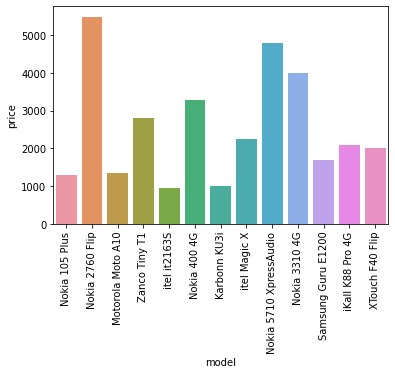

In [22]:
sns.barplot(x = Defect['model'],y = Defect['price'],data = Defect)
plt.xticks(rotation='vertical')
plt.show()

From the research all the phones in which the price is less than 2500 are not smartphones, and since in this project we are focusing on the smartphones thus we will ignore these phones

In [23]:
df = df[df['price'] >= 2500]

<AxesSubplot:ylabel='Has_dual_sim'>

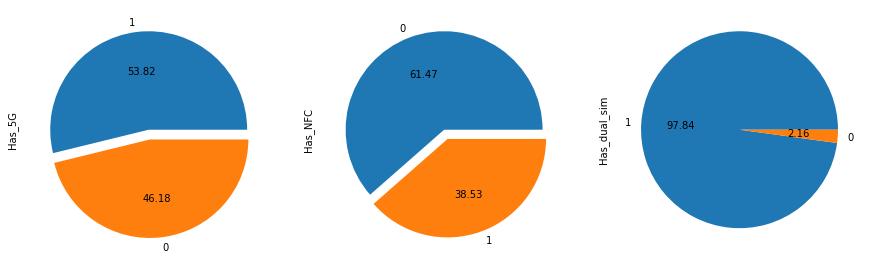

In [33]:
ex = [0,0.1]
fig,ax = plt.subplots(1,3,figsize=(15,9))

df['Has_5G'].value_counts().plot(kind='pie',autopct='%.2f',explode=ex,ax = ax[0])
df['Has_NFC'].value_counts().plot(kind='pie',autopct='%.2f',explode=ex,ax = ax[1])
df['Has_dual_sim'].value_counts().plot(kind='pie',autopct='%.2f',ax = ax[2])

<AxesSubplot:ylabel='Has_Wifi'>

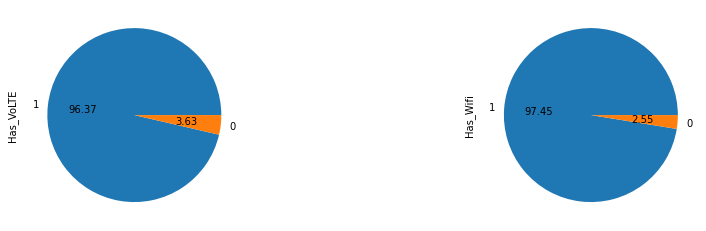

In [29]:
ex = [0,0]
fig,ax = plt.subplots(1,2,figsize=(15,4))

df['Has_VoLTE'].value_counts().plot(kind='pie',autopct='%.2f',explode=ex,ax = ax[0])
df['Has_Wifi'].value_counts().plot(kind='pie',autopct='%.2f',explode=ex,ax = ax[1])

<AxesSubplot:>

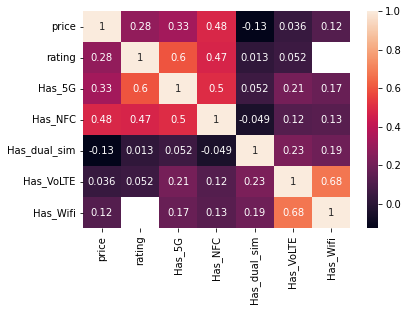

In [14]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.head(4)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,Has_5G,Has_NFC,Has_dual_sim,Has_VoLTE,Has_Wifi
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,1,1,1,1,1
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,1,0,1,1,1
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,1,0,1,1,1
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,1,0,1,1,1


## Data Assessing





### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto